In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Reshape
from tensorflow.keras.optimizers import Adam

In [2]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
import string
import pandas as pd
import numpy as np
import os
import copy
import re
import copy

In [3]:
terms=open("C:/Users/beera/Downloads/terms.txt").read().split('\n')
sw=open("C:/Users/beera/Downloads/stopwords.txt").read().split('\n')

In [4]:
inpu_train_len=[]
def preprocess(d):
 data=d.strip()
 data=data.split('\n')
 data=' '.join(data)
 data=re.sub(r'([a-z!"$%)?\'])\.([A-Z])', r'\1. \2',data)
 data=re.sub(r'([0-9])\. ([A-Z])', r'\1 . \2',data)
 data=data.lower()
 data=nltk.sent_tokenize(data)
 inpu_train_len.append(len(data))
 stemmer=PorterStemmer()
 i=0
 for i in range(len(data)):
  data[i]=data[i].translate(str.maketrans('','', string.punctuation))
  data[i]=nltk.word_tokenize(data[i])
  rdata=[]
  for q in data[i]:
   if q not in sw:
    rdata.append(q)
  data[i]=copy.deepcopy(rdata)
  j=0
  rdata=[]
  while(j<len(data[i])):
   data[i][j]=stemmer.stem(data[i][j])
   if data[i][j] in terms:
    rdata.append(terms.index(data[i][j])+1)
    j+=1
   else:
    j+=1
  data[i]=copy.deepcopy(rdata)

 rectangle=np.zeros((246,500),dtype='int32')
 for i in range(len(data)):
     rectangle[i:i+1,0:len(data[i])]=data[i]


 return rectangle

In [5]:
got=[]
def preprocesssum(d):
 data=d.strip()
 data=data.split('\n')
 data=' '.join(data)
 data=re.sub(r'([a-zA-Z])\.([A-Z])', r'\1. \2',data)
 data=re.sub(r'([0-9!"$%)?\'])\.([A-Z])', r'\1 . \2',data)
 data=data.lower()
 data=nltk.sent_tokenize(data)
 got.append(len(data))
 stemmer=PorterStemmer()
 i=0
 for i in range(len(data)):
  data[i]=data[i].translate(str.maketrans('','', string.punctuation))
  data[i]=nltk.word_tokenize(data[i])
  rdata=[]
  for q in data[i]:
   if q not in sw:
    rdata.append(q)
  data[i]=copy.deepcopy(rdata)
  j=0
  rdata=[]
  while(j<len(data[i])):
   data[i][j]=stemmer.stem(data[i][j])
   if data[i][j] in terms:
    rdata.append(terms.index(data[i][j])+1)
    j+=1
   else:
    j+=1
  data[i]=copy.deepcopy(rdata)
 
 rectangle=np.zeros((246,500),dtype='int32')
 for i in range(len(data)):
     rectangle[i:i+1,0:len(data[i])]=data[i]


 return rectangle

In [6]:
def pretest(d):
 data=d.strip()
 data=data.split('\n')
 data=' '.join(data)
 data=re.sub(r'([a-z!"$%)?\'])\.([A-Z])', r'\1. \2',data)
 data=re.sub(r'([0-9])\. ([A-Z])', r'\1 . \2',data)
 data=data.lower()
 data=nltk.sent_tokenize(data)
 return data

In [7]:
def pretestsum(d):
 data=d.strip()
 data=data.split('\n')
 data=' '.join(data)
 data=re.sub(r'([a-zA-Z])\.([A-Z])', r'\1. \2',data)
 data=re.sub(r'([0-9!"$%)?\'])\.([A-Z])', r'\1 . \2',data)
 data=data.lower()
 return data

In [8]:
train_path=os.path.abspath(os.path.join("C:/Users/beera/Downloads/generated-data/bbc_combined_train.csv"))
test_path=os.path.abspath(os.path.join("C:/Users/beera/Downloads/generated-data/bbc_combined_test.csv"))
val_path=os.path.abspath(os.path.join("C:/Users/beera/Downloads/generated-data/bbc_combined_val.csv"))

In [9]:
train_df=pd.read_csv(train_path,header=0,usecols=[1,2],nrows=1777)
print('Number of train sentences: ',len(train_df))
input_train=train_df['article'].values
target_train=train_df['summary'].values

test_df=pd.read_csv(test_path,header=0,usecols=[1,2],nrows=221)
print('Number of train sentences: ',len(test_df))
input_test=test_df['article'].values
target_test=test_df['summary'].values
target=copy.deepcopy(target_test)
inpu=copy.deepcopy(input_test)

val_df=pd.read_csv(val_path,header=0,usecols=[1,2],nrows=227)
print('Number of train sentences: ',len(val_df))
input_val=val_df['article'].values
target_val=val_df['summary'].values

Number of train sentences:  1776
Number of train sentences:  221
Number of train sentences:  227


In [10]:
target_train_len=[]
for i in range(0,len(input_train)):
 rectangle=np.zeros((246),dtype='int32')
 input_train[i]=preprocess(input_train[i]).tolist()
 target_train[i]=preprocesssum(target_train[i]).tolist()
 for j in range(0,len(input_train[i])):
  if(input_train[i][j].count(0)<500 and input_train[i][j] in target_train[i]):
   rectangle[j]=1
 rect=copy.deepcopy(rectangle).tolist()
 target_train_len.append(rect.count(1))
 input_train[i]=tf.convert_to_tensor(input_train[i],dtype='int32')
 target_train[i]=tf.convert_to_tensor(rectangle,dtype='int32')

In [11]:
for i in range(0,len(input_test)):
 inpu[i]=pretest(inpu[i])
 target[i]=pretestsum(target[i])
 rectangle=np.zeros((246),dtype='int32')
 input_test[i]=preprocess(input_test[i]).tolist()
 target_test[i]=preprocesssum(target_test[i]).tolist()
 for j in range(0,len(input_test[i])):
  if(input_test[i][j].count(0)<500 and input_test[i][j] in target_test[i]):
   rectangle[j]=1
 input_test[i]=tf.convert_to_tensor(input_test[i],dtype='int32')
 target_test[i]=tf.convert_to_tensor(rectangle,dtype='int32')

In [12]:
print(input_test[i])
print(rectangle)
print(target[i])

tf.Tensor(
[[ 843 1196  847 ...    0    0    0]
 [4601 3465 1097 ...    0    0    0]
 [9492 3421 3465 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]], shape=(246, 500), dtype=int32)
[1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
but the set-top box which receives hdtv broadcasts has to plug into a display - tv set - that can show the images at the much higher resolution that hd demands, if hdtv is to be "real" . thousands of flat panel screens - lcds (li

In [13]:
for i in range(0,len(input_val)):
 rectangle=np.zeros((246),dtype='int32')
 input_val[i]=preprocess(input_val[i]).tolist()
 target_val[i]=preprocesssum(target_val[i]).tolist()
 for j in range(0,len(input_val[i])):
  if(input_val[i][j].count(0)<500 and input_val[i][j] in target_val[i]):
   rectangle[j]=1
 input_val[i]=tf.convert_to_tensor(input_val[i],dtype='int32')
 target_val[i]=tf.convert_to_tensor(rectangle,dtype='int32')

In [14]:
#Input layer
input_layer=Input(shape=(246,500))

#BiLSTM layer
bi_lstm=Bidirectional(LSTM(128,return_sequences=True))(input_layer)

#Dense layer
dense_layer=Dense(1,activation='sigmoid')(bi_lstm)

#Reshape layer
reshape_layer=Reshape((246,))(dense_layer)

#Create the model
model=tf.keras.Model(inputs=input_layer,outputs=reshape_layer)

optimizer=Adam(learning_rate=0.005)

#Compiling the model 
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

#Display the model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 246, 500)]        0         
                                                                 
 bidirectional (Bidirection  (None, 246, 256)          644096    
 al)                                                             
                                                                 
 dense (Dense)               (None, 246, 1)            257       
                                                                 
 reshape (Reshape)           (None, 246)               0         
                                                                 
Total params: 644353 (2.46 MB)
Trainable params: 644353 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
epochs=50
batch_size=9

In [16]:
input_train=np.array([np.array(val) for val in input_train])
input_test=np.array([np.array(val) for val in input_test])
input_val=np.array([np.array(val) for val in input_val])
target_train=np.array([np.array(val) for val in target_train])
target_test=np.array([np.array(val) for val in target_test])
target_val=np.array([np.array(val) for val in target_val])

In [17]:
print(input_train.shape)
print(target_train.shape)
print(input_test.shape)
print(target_test.shape)
print(input_val.shape)
print(target_val.shape)

(1776, 246, 500)
(1776, 246)
(221, 246, 500)
(221, 246)
(227, 246, 500)
(227, 246)


In [18]:
history=model.fit(input_train,target_train,epochs=epochs,batch_size=batch_size,validation_data=(input_val,target_val))

Epoch 1/50


198/198 [==============================] - 26s 117ms/step - loss: 0.0591 - accuracy: 0.2230 - val_loss: 0.0557 - val_accuracy: 0.3921
Epoch 2/50
198/198 [==============================] - 24s 120ms/step - loss: 0.0494 - accuracy: 0.2939 - val_loss: 0.0552 - val_accuracy: 0.3524
Epoch 3/50
198/198 [==============================] - 23s 115ms/step - loss: 0.0494 - accuracy: 0.3401 - val_loss: 0.0552 - val_accuracy: 0.4009
Epoch 4/50
198/198 [==============================] - 22s 112ms/step - loss: 0.0492 - accuracy: 0.4578 - val_loss: 0.0555 - val_accuracy: 0.4537
Epoch 5/50
198/198 [==============================] - 22s 112ms/step - loss: 0.0490 - accuracy: 0.5766 - val_loss: 0.0550 - val_accuracy: 0.6872
Epoch 6/50
198/198 [==============================] - 22s 113ms/step - loss: 0.0489 - accuracy: 0.6092 - val_loss: 0.0547 - val_accuracy: 0.5198
Epoch 7/50
198/198 [==============================] - 22s 113ms/step - loss: 0.0489 - accuracy: 0.6126 - val_loss: 0.0555 - val_

In [19]:
evaluation=model.evaluate(input_test,target_test)
print("Test Loss: ",evaluation[0])
print("Test Accuracy: ", evaluation[1])

7/7 [==============================] - 1s 81ms/step - loss: 0.0463 - accuracy: 0.7330
Test Loss:  0.04632853716611862
Test Accuracy:  0.733031690120697


In [20]:
predictions=model.predict(input_test)
pred=[]
print(predictions[0])
t=0
mp=0.40
predict=[i.tolist() for i in predictions]
for z in predict:
 rx=0
 result1=[]
 result2=[]
 for k in z:
  if k>mp:
   result1.append(k)
  else:
   result2.append(k)
 if len(result1)<5:
  result1+=sorted(result2)[-(5-len(result1)):] 
 stres=""
 rx=float(sum(result1))/float(len(result1))
 print(rx,end=" ")
 print(mp,end=" ")
 mp=mp*0.999+0.001*rx
 print(mp)
 for k in result1:
  stres+=inpu[t][z.index(k)]+" "
 pred.append(stres)
 t+=1
print(pred[0])
print(target[0])

7/7 [==============================] - 1s 87ms/step
[7.0462638e-01 5.3383142e-01 5.8231896e-01 4.1507253e-01 4.0898481e-01
 4.2945039e-01 3.9381999e-01 4.4766170e-01 4.3521902e-01 4.6464354e-01
 4.8583838e-01 4.6089959e-01 5.6721216e-01 3.7023216e-01 2.8269047e-01
 4.2455363e-01 4.1577396e-01 4.6892756e-01 4.4774342e-01 4.9473789e-01
 4.3156758e-01 4.4840622e-01 4.2384189e-01 3.3387220e-01 3.9945617e-01
 4.4866869e-01 4.1353494e-01 4.6712101e-01 3.9740375e-01 4.5789257e-01
 3.9397141e-01 4.8610656e-07 2.8897619e-08 9.4658033e-09 3.9819223e-09
 2.7576970e-09 3.0529232e-09 4.0801624e-09 3.2911895e-09 2.5154896e-09
 2.1005919e-09 1.8546181e-09 1.6965391e-09 1.5862300e-09 1.5056385e-09
 1.4454198e-09 1.3978740e-09 1.3478038e-09 1.2515176e-09 1.1112878e-09
 1.0274420e-09 9.8986197e-10 9.6905328e-10 9.5385111e-10 9.4151831e-10
 9.3289332e-10 9.0599345e-10 7.8377743e-10 6.4569977e-10 6.1020045e-10
 6.0731742e-10 6.0612892e-10 6.0408606e-10 6.0159211e-10 5.9895422e-10
 5.9623007e-10 5.9341076e

In [21]:
import evaluate
rouge=evaluate.load('rouge')
results=rouge.compute(predictions=pred, references=target)
print(results)

c:\Users\beera\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'rouge1': 0.663951671208567, 'rouge2': 0.5776957210220997, 'rougeL': 0.42998571089790516, 'rougeLsum': 0.43015941581201833}


In [22]:
f=open('target.txt','w'); p=open('predictnonMAML.txt','w')
f.close(); p.close()
f=open('target.txt','a'); p=open('predictnonMAML.txt','a')
for i in range(len(pred)):
 f.write(target[i]+'\n\n')
 p.write(pred[i]+'\n\n')
f.close(); p.close();

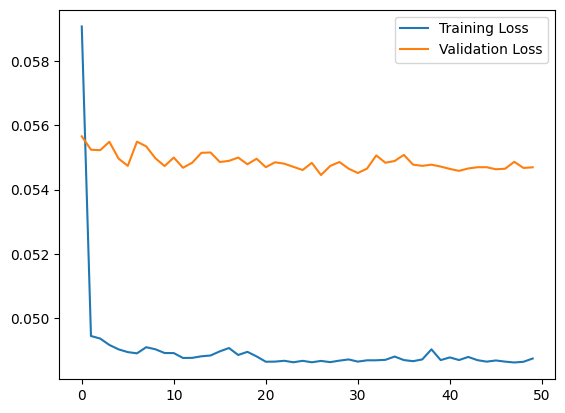

In [23]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

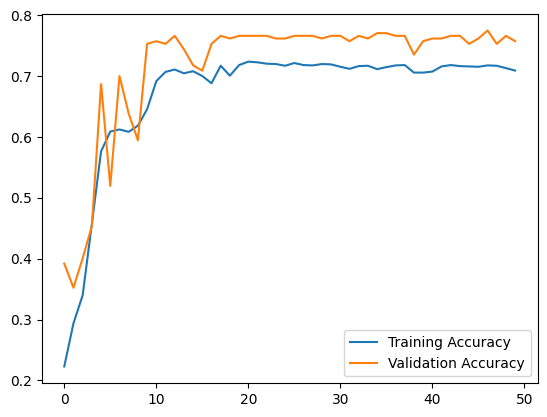

In [24]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()